In [267]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

In [268]:
u = lambda x,t: 3 - x + np.cos((3 * np.pi * x)/4) * (np.exp(-(((3*np.pi)/4)**2) * t))

a = 1
f = lambda x, t:  0
u_0 = lambda x: 3 - x + np.cos((3 * np.pi * x)/4)
g_0 = lambda t: 1
g_1 = lambda t: 1

l = 2
T = 1

dx = 1e-2
dt = 1e-5

In [269]:
def plot_surface(xm,tm,um,title = '',x_lable = 'x',y_lable = 't',z_lable = 'Z'):
    ax = axes3d.Axes3D(plt.figure())
    ax.set_xlabel(x_lable)
    ax.set_ylabel(y_lable)
    ax.set_zlabel(z_lable)
    ax.plot_surface(xm, tm , um, rstride=5, cstride=5,cmap = cm.jet )
    plt.show()

def greed(Nx, Nt, x_0 = 0, x_N = l, t_0 = 0, t_N = T):
    return np.linspace(x_0, x_N, Nx), np.linspace(t_0, t_N, Nt)

def solve(dx, dt, f, u_0, g_0, g_1, a):
    Nx, Nt = int(1/dx), int(1/dt)
    x, t = greed(Nx, Nt)
    U = np.zeros(shape = (Nt, Nx))
    U[0, :], U[:, 0], U[:, -1] = u_0(x[:]), g_0(t[:]), g_1(t[:])

    s = a*dt/dx**2
    for j in range(0, Nt-1):
        for i in range(1, Nx-1):
            U[j+1,i] = U[j,i] + s * (U[j,i-1] - 2 * U[j,i] + U[j,i+1]) + dt*x[i]
    return U

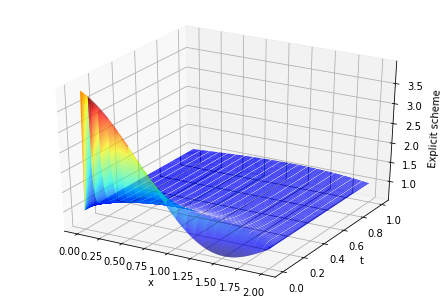

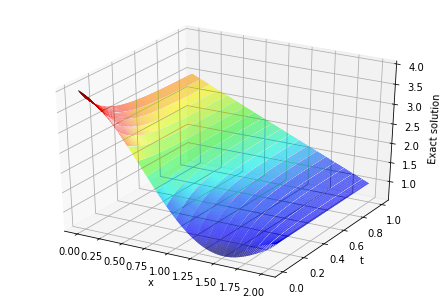

Максимальная погрешность: 3.0
Теоретический порядок погрешности O(dx^2 + dt): 0.00011


In [270]:
Nx, Nt = int(1/dx), int(1/dt)
U = solve(dx, dt, f, u_0, g_0, g_1, a)
x, t  = greed(Nx, Nt)
x_mesh, t_mesh = np.meshgrid(x, t)
plot_surface(x_mesh, t_mesh, U, z_lable = 'Explicit scheme')
plot_surface(x_mesh,t_mesh,u(x_mesh,t_mesh),z_lable = 'Exact solution')
er=abs(U - u(x_mesh,t_mesh))
print("Максимальная погрешность:",er.max())
print("Теоретический порядок погрешности O(dx^2 + dt):", dx**2 + dt)